In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import toolz
import numpy as np
import pickle
import matplotlib
import matplotlib.pyplot as plt
import datetime

from tqdm.notebook import tqdm
from glob import glob

import pandas as pd
import lightgbm

try:
    dir_changed
except:
    os.chdir('..')
    dir_changed = True

from src.pipeline import train_model
from src.loaders import CSVLoader

from src.add_features import (
    CorrelationFinder,
    FeatureManager,
    VarianceCalculator,
    OutlierFinder,
    BreakTimer
)


In [3]:
%matplotlib inline

In [4]:
loader = CSVLoader()
machines = pd.unique(loader.all_months["machine_id"]).tolist()

fm = FeatureManager(machine_id=machines[1])

grouping_freq = "1min"
window_size = 3

/home/michal/anaconda3/envs/kghm/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
features = [
    CorrelationFinder(
        [
            ("FUELUS", "SPEED"),
            ("GROILT", "HYDOILT"),
            ("INTAKET", "INTAKEP"),
            ("SPEED", "INTAKEP"),
        ],
        freq="1min",
    ),
    VarianceCalculator(
        "FUELUS",
        freq="1min",
    ),
    VarianceCalculator(
        "INTAKEP",
        freq="1min",
    ),
    VarianceCalculator(
        "GROILP",
        freq="1min",
    ),
    BreakTimer(),
    OutlierFinder(
        [
            ("FUELUS", "SPEED"),
            ("GROILT", "HYDOILT"),
            ("INTAKET", "INTAKEP"),
            ("SPEED", "INTAKEP"),
        ],
        freq="1min",
    ),
]

In [7]:
for feature in tqdm(features):
    fm.test_feature(feature)
    fm.save_current_feature()

NameError: name 'tqdm' is not defined

In [26]:
accuracies = {}
importances = {}

In [29]:
fm.load_machine_data(machine_id)

/home/michal/anaconda3/envs/kghm/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [31]:
[
            ent
            for ent in sorted(
                fm.loader.engineered_data.columns
                if fm.loader.engineered_data is not None
                else []
            )
]

[]

100%|██████████| 40320/40320 [00:36<00:00, 1112.81it/s]
(4796,)
(4796, 48)
/home/michal/anaconda3/envs/kghm/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
"['SWITCHMOVE'] not in index"
"['SWITCHMOVE'] not in index"
"['SWITCHMOVE'] not in index"
100%|██████████| 22493/22493 [00:20<00:00, 1079.50it/s]
(4798,)
(4798, 57)
/home/michal/anaconda3/envs/kghm/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
100%|██████████| 40319/40319 [00:36<00:00, 1091.22it/s]
(4796,)
(4796, 57)
/home/michal/anaconda3/envs/kghm/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise com

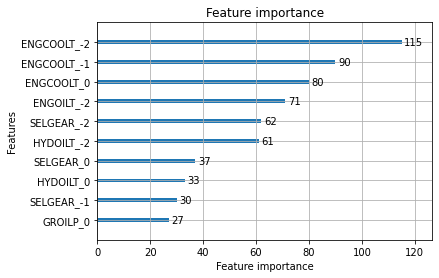

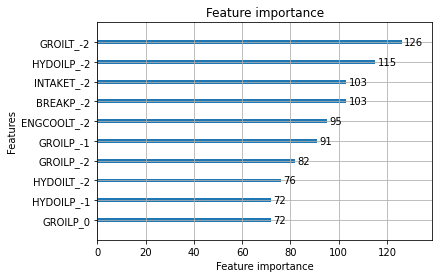

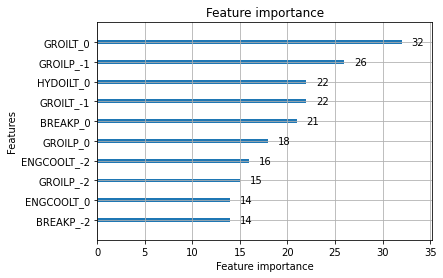

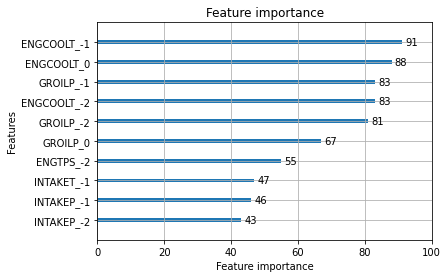

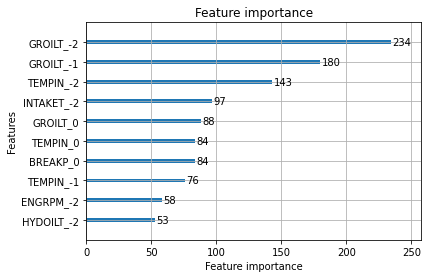

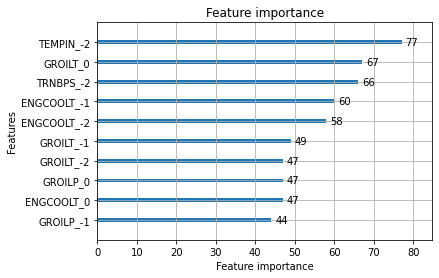

In [27]:
for machine_id in machines:
    try:
        fm.load_machine_data(machine_id)
        model, X_val, y_val = train_model(fm, grouping_freq=grouping_freq, window_size=window_size)
        preds = model.predict(X_val)
        accuracies[machine_id] = (preds == y_val).mean()
        lightgbm.plot_importance(model.trained_model, max_num_features=10)
    except Exception as e:
        print(e)

In [28]:
accuracies

{'LK3 045L': 0.7854166666666667,
 'WOS 174L': 0.8458333333333333,
 'WOS 175L': 0.8322916666666667,
 'WOS 176L': 0.8177083333333334,
 'WOS 177L': 0.709375,
 'WOS 179L': 0.7316561844863732}

In [3]:
for i in range(3):
    lightgbm.plot_importance(model.trained_model, max_num_features=10)

NameError: name 'model' is not defined

In [28]:
accuracies

{'LK3 045L': 0.79375}

In [38]:
importances

{'LK3 045L': <AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>}

In [40]:
plt.show(importances['LK3 045L'])

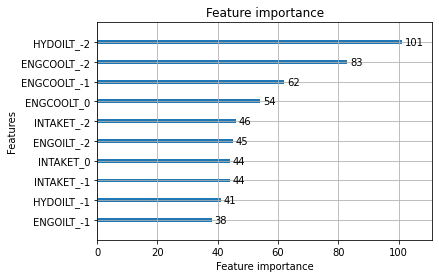

In [42]:
t = lightgbm.plot_importance(model.trained_model, max_num_features=10)

In [44]:
dir(t)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_clipon',
 '_clippath',
 '_colorbars',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_axis_map',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',